In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, LSTM, Input
from keras import optimizers
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import scipy.stats as stats
from keras.layers import Bidirectional
from wordcloud import WordCloud
import re
from wordcloud import STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk import ngrams
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from textblob import TextBlob
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
stock='/content/drive/MyDrive/Colab Notebooks/sp500.csv'
nlp='/content/drive/MyDrive/Colab Notebooks/reuters_headlines.csv'
data1=pd.read_csv(stock)
news=pd.read_csv(nlp)

In [ ]:
data1.shape

(589, 7)

In [ ]:
news.shape

(32770, 3)

In [ ]:
from dateutil.parser import parse

data1['Date'] = data1['Date'].apply(lambda x: parse(x, fuzzy_with_tokens=True)[0] if pd.notna(x) else pd.NaT)

In [ ]:
data1

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-07-20,3251.84,3224.29,3258.61,3215.16,NaN,0.84%
1,2020-07-17,3224.73,3224.21,3233.52,3205.65,NaN,0.28%
2,2020-07-16,3215.57,3208.36,3220.39,3198.59,NaN,-0.34%
3,2020-07-15,3226.56,3225.98,3238.28,3200.76,NaN,0.91%
4,2020-07-14,3197.52,3141.11,3200.95,3127.66,NaN,1.34%
...,...,...,...,...,...,...,...
584,2018-03-23,2588.26,2646.71,2657.67,2585.89,NaN,-2.10%
585,2018-03-22,2643.69,2691.36,2695.68,2641.59,NaN,-2.52%
586,2018-03-21,2711.93,2714.99,2739.14,2709.79,NaN,-0.18%
587,2018-03-20,2716.94,2715.05,2724.22,2710.05,NaN,0.15%


In [ ]:
data=data1[::-1]
data

,Date,Price,Open,High,Low,Vol.,Change %
588,2018-03-19,2712.92,2741.38,2741.38,2694.59,NaN,-1.42%
587,2018-03-20,2716.94,2715.05,2724.22,2710.05,NaN,0.15%
586,2018-03-21,2711.93,2714.99,2739.14,2709.79,NaN,-0.18%
585,2018-03-22,2643.69,2691.36,2695.68,2641.59,NaN,-2.52%
584,2018-03-23,2588.26,2646.71,2657.67,2585.89,NaN,-2.10%
...,...,...,...,...,...,...,...
4,2020-07-14,3197.52,3141.11,3200.95,3127.66,NaN,1.34%
3,2020-07-15,3226.56,3225.98,3238.28,3200.76,NaN,0.91%
2,2020-07-16,3215.57,3208.36,3220.39,3198.59,NaN,-0.34%
1,2020-07-17,3224.73,3224.21,3233.52,3205.65,NaN,0.28%


In [ ]:
data.rename(columns={'Date': 'Time'}, inplace=True)

In [ ]:
news

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


In [ ]:
news1=news[::-1]
news1

,Headlines,Time,Description
32769,UK will always consider ways to improve data l...,Mar 20 2018,Britain will consider any suggestions to give ...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
...,...,...,...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...


In [ ]:
from dateutil.parser import parse

news1['Time'] = news1['Time'].apply(lambda x: parse(x, fuzzy_with_tokens=True)[0] if pd.notna(x) else pd.NaT)

In [ ]:
news1

,Headlines,Time,Description
32769,UK will always consider ways to improve data l...,2018-03-20,Britain will consider any suggestions to give ...
32768,Pratt & Whitney to deliver spare A320neo engin...,2018-03-20,Pratt & Whitney will soon begin deliveries of ...
32767,McDonald's sets greenhouse gas reduction targets,2018-03-20,McDonald's Corp on Tuesday announced an approv...
32766,Prosecutors search Volkswagen headquarters in ...,2018-03-20,German prosecutors said on Tuesday they had se...
32765,Malaysia says never hired British data firm at...,2018-03-20,The Malaysian government and the ruling party ...
...,...,...,...
4,U.S. Republicans seek liability protections as...,2020-07-17,A battle in the U.S. Congress over a new coron...
3,Twitter says attackers downloaded data from up...,2020-07-18,Twitter Inc said on Saturday that hackers were...
2,Trail of missing Wirecard executive leads to B...,2020-07-18,Former Wirecard chief operating officer Jan M...
1,Disney cuts ad spending on Facebook amid growi...,2020-07-18,Walt Disney has become the latest company to ...


In [ ]:
news1 = pd.concat([news1['Time'], news1['Headlines']], axis=1)

In [ ]:
news1

,Time,Headlines
32769,2018-03-20,UK will always consider ways to improve data l...
32768,2018-03-20,Pratt & Whitney to deliver spare A320neo engin...
32767,2018-03-20,McDonald's sets greenhouse gas reduction targets
32766,2018-03-20,Prosecutors search Volkswagen headquarters in ...
32765,2018-03-20,Malaysia says never hired British data firm at...
...,...,...
4,2020-07-17,U.S. Republicans seek liability protections as...
3,2020-07-18,Twitter says attackers downloaded data from up...
2,2020-07-18,Trail of missing Wirecard executive leads to B...
1,2020-07-18,Disney cuts ad spending on Facebook amid growi...


In [ ]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained('yiyanghkust/finbert-tone')
model = TFAutoModelForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/439M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at yiyanghkust/finbert-tone.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [ ]:
def get_news_embedding(headline):
    inputs = tokenizer(headline, return_tensors="tf", truncation=True, padding=True, max_length=128)
    outputs = model(**inputs)
    logits = outputs.logits
    return logits

news1['logits'] = news1['Headlines'].apply(lambda x: get_news_embedding(x).numpy())

In [ ]:
news1

,Time,Headlines,logits
32769,2018-03-20,UK will always consider ways to improve data l...,"[[5.292605, -3.9292023, -5.8445306]]"
32768,2018-03-20,Pratt & Whitney to deliver spare A320neo engin...,"[[6.6197443, -5.221166, -5.1080027]]"
32767,2018-03-20,McDonald's sets greenhouse gas reduction targets,"[[5.1848583, -4.3081403, -5.262976]]"
32766,2018-03-20,Prosecutors search Volkswagen headquarters in ...,"[[6.899523, -8.217215, -2.0240512]]"
32765,2018-03-20,Malaysia says never hired British data firm at...,"[[4.7983036, -7.3536696, 0.42555395]]"
...,...,...,...
4,2020-07-17,U.S. Republicans seek liability protections as...,"[[0.7089442, -3.7963939, 0.109072655]]"
3,2020-07-18,Twitter says attackers downloaded data from up...,"[[6.778524, -4.4625077, -4.569649]]"
2,2020-07-18,Trail of missing Wirecard executive leads to B...,"[[4.1019397, -6.471667, 0.8410904]]"
1,2020-07-18,Disney cuts ad spending on Facebook amid growi...,"[[-0.8309004, -5.476698, 8.710294]]"


In [ ]:
news_avg =news1.groupby('Time')['logits'].mean().reset_index()

In [ ]:
news_avg

,Time,logits
0,2018-03-20,"[[3.4992592, -4.593193, -1.5034752]]"
1,2018-03-21,"[[2.5984976, -3.7608325, -1.4802477]]"
2,2018-03-22,"[[2.8223498, -4.2410636, -0.92359275]]"
3,2018-03-23,"[[2.1526031, -3.2657151, -1.1762637]]"
4,2018-03-24,"[[4.2764773, -5.3807707, -1.2081784]]"
...,...,...
847,2020-07-14,"[[2.3343751, -3.6175845, -0.92368704]]"
848,2020-07-15,"[[2.2104387, -2.2284043, -2.7757382]]"
849,2020-07-16,"[[2.5440652, -3.7574198, -0.9263731]]"
850,2020-07-17,"[[2.7234106, -4.42522, -0.65037245]]"


In [ ]:
data

,Time,Price,Open,High,Low,Vol.,Change %
588,2018-03-19,2712.92,2741.38,2741.38,2694.59,NaN,-1.42%
587,2018-03-20,2716.94,2715.05,2724.22,2710.05,NaN,0.15%
586,2018-03-21,2711.93,2714.99,2739.14,2709.79,NaN,-0.18%
585,2018-03-22,2643.69,2691.36,2695.68,2641.59,NaN,-2.52%
584,2018-03-23,2588.26,2646.71,2657.67,2585.89,NaN,-2.10%
...,...,...,...,...,...,...,...
4,2020-07-14,3197.52,3141.11,3200.95,3127.66,NaN,1.34%
3,2020-07-15,3226.56,3225.98,3238.28,3200.76,NaN,0.91%
2,2020-07-16,3215.57,3208.36,3220.39,3198.59,NaN,-0.34%
1,2020-07-17,3224.73,3224.21,3233.52,3205.65,NaN,0.28%


In [ ]:
df2 = pd.merge(news_avg[['Time', 'logits']], data[['Time', 'Price']], on='Time', how='inner')

In [ ]:
df2

,Time,logits,Price
0,2018-03-20,"[[3.4992592, -4.593193, -1.5034752]]",2716.94
1,2018-03-21,"[[2.5984976, -3.7608325, -1.4802477]]",2711.93
2,2018-03-22,"[[2.8223498, -4.2410636, -0.92359275]]",2643.69
3,2018-03-23,"[[2.1526031, -3.2657151, -1.1762637]]",2588.26
4,2018-03-26,"[[3.3169188, -3.8983479, -2.5702991]]",2658.55
...,...,...,...
582,2020-07-13,"[[2.7259967, -3.3496811, -2.1668193]]",3155.22
583,2020-07-14,"[[2.3343751, -3.6175845, -0.92368704]]",3197.52
584,2020-07-15,"[[2.2104387, -2.2284043, -2.7757382]]",3226.56
585,2020-07-16,"[[2.5440652, -3.7574198, -0.9263731]]",3215.57


In [ ]:
data_train = df2[0:np.int16(0.8*len(df2))]
data_test = df2[np.int16(0.8*len(df2)):]

In [ ]:
mean_price = data_train['Price'].mean()
std_price = data_train['Price'].std()

data_train['price_zscore'] = (data_train['Price'] - mean_price) / std_price

<ipython-input-25-76831ff33448>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['price_zscore'] = (data_train['Price'] - mean_price) / std_price


In [ ]:
data_train = data_train.drop(columns=['Time', 'Price'])

In [ ]:
data_train

,logits,price_zscore
0,"[[3.4992592, -4.593193, -1.5034752]]",-0.794267
1,"[[2.5984976, -3.7608325, -1.4802477]]",-0.822548
2,"[[2.8223498, -4.2410636, -0.92359275]]",-1.207757
3,"[[2.1526031, -3.2657151, -1.1762637]]",-1.520655
4,"[[3.3169188, -3.8983479, -2.5702991]]",-1.123874
...,...,...
464,"[[2.3308425, -2.880615, -2.0012853]]",2.641229
465,"[[2.4602008, -3.8382628, -0.7297712]]",2.471487
466,"[[2.4039092, -3.9542143, -0.89843816]]",2.178854
467,"[[1.6787969, -3.6061666, 0.31305364]]",2.362935


In [ ]:
logits = np.array([np.array(item[0]) for item in data_train['logits']], dtype=np.float32)
price_zscore = np.array(data_train['price_zscore'], dtype=np.float32)

In [ ]:
features = np.column_stack((logits, price_zscore))
features

array([[ 3.4992592 , -4.593193  , -1.5034752 , -0.7942673 ],
       [ 2.5984976 , -3.7608325 , -1.4802477 , -0.82254833],
       [ 2.8223498 , -4.2410636 , -0.92359275, -1.2077575 ],
       ...,
       [ 2.4039092 , -3.9542143 , -0.89843816,  2.1788542 ],
       [ 1.6787969 , -3.6061666 ,  0.31305364,  2.3629348 ],
       [ 2.3583784 , -3.7774458 , -0.39313343,  2.3469033 ]],
      dtype=float32)

In [ ]:
x_train = []
y_train = []

for i in range(len(features) - 5):
    x_train.append(features[i:i+5])
    y_train.append(features[i+5])


In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 1.8838
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 1.8343
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.8444
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.8635
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1.8383
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 1.8244
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1.8502
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 1.8250
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.8244
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1.8324
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.8474
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.8353
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 1.8405
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.7977
Epoch 15/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 1.8303
E

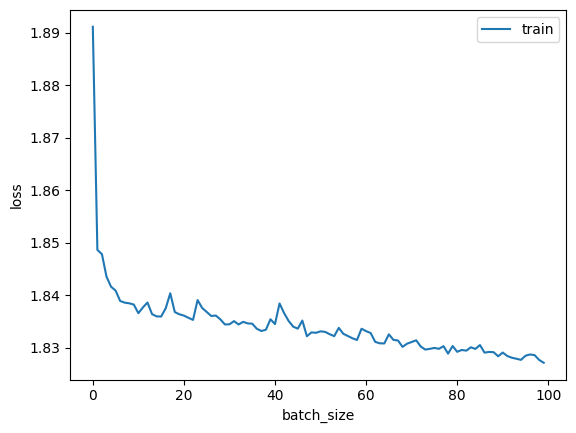

In [ ]:
from typing import Sequence
model = Sequential()
model.add(Conv1D(128, 1, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model.add(Bidirectional(LSTM(64, activation='relu')))
model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer='adam')
history=model.fit(x_train,y_train, epochs=100, batch_size=32)
plt.plot(history.history['loss'], label='train')
plt.ylabel('loss')
plt.xlabel('batch_size')
plt.legend()
plt.show()

In [ ]:
mean_price = data_test['Price'].mean()
std_price = data_test['Price'].std()

data_test['price_zscore_z'] = (data_test['Price'] - mean_price) / std_price

<ipython-input-102-1a722cd3c4bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['price_zscore_z'] = (data_test['Price'] - mean_price) / std_price


In [ ]:
data_test2 = data_test.drop(columns=['Time', 'Price'])

In [ ]:
logits_test = np.array([np.array(item[0]) for item in data_test2['logits']], dtype=np.float32)
price_zscore_test = np.array(data_test2['price_zscore_z'], dtype=np.float32)

In [ ]:
features_test = np.column_stack((logits_test, price_zscore_test))

In [ ]:
x_test = []
y_test = []

for i in range(len(features_test) - 5):
    x_test.append(features_test[i:i+5])
    y_test.append(features_test[i+5])

In [ ]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
predictions = model.predict(x_test)
predictions

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step


array([[ 0.46113986],
       [ 0.65276366],
       [ 0.12942335],
       [ 0.72988117],
       [ 0.6940113 ],
       [ 0.78386396],
       [ 0.95521724],
       [ 0.7889721 ],
       [ 0.365667  ],
       [ 0.6552287 ],
       [ 0.66155356],
       [ 0.5536749 ],
       [ 0.625003  ],
       [ 0.33131653],
       [ 0.09512894],
       [-0.14290605],
       [-0.24864073],
       [ 0.1284156 ],
       [ 0.04170228],
       [ 0.46646106],
       [-0.11231375],
       [-0.25896028],
       [-0.65010536],
       [-0.6230243 ],
       [-0.84006196],
       [-1.4042106 ],
       [-1.0974483 ],
       [-1.6563896 ],
       [-1.4186271 ],
       [-1.5354569 ],
       [-1.9441202 ],
       [-1.8532392 ],
       [-2.1315074 ],
       [-1.6376283 ],
       [-1.6695658 ],
       [-1.3264832 ],
       [-1.4178785 ],
       [-1.37427   ],
       [-1.3427647 ],
       [-1.5057517 ],
       [-1.5583739 ],
       [-1.5849923 ],
       [-1.2685554 ],
       [-1.2489514 ],
       [-1.0949304 ],
       [-0

In [ ]:
mean_price = data_test['Price'].mean()
std_price = data_test['Price'].std()

In [ ]:
predictions_r = (predictions * std_price) + mean_price
predictions_r

array([[3088.9172],
       [3140.2178],
       [3000.1118],
       [3160.8633],
       [3151.2603],
       [3175.3152],
       [3221.189 ],
       [3176.6826],
       [3063.3577],
       [3140.8777],
       [3142.5708],
       [3113.6902],
       [3132.786 ],
       [3054.1616],
       [2990.9307],
       [2927.2053],
       [2898.8987],
       [2999.842 ],
       [2976.6277],
       [3090.3418],
       [2935.3953],
       [2896.136 ],
       [2791.4207],
       [2798.6707],
       [2740.5667],
       [2589.5356],
       [2671.6604],
       [2522.0237],
       [2585.6763],
       [2554.3992],
       [2444.9941],
       [2469.3242],
       [2394.828 ],
       [2527.0464],
       [2518.4963],
       [2610.3445],
       [2585.8767],
       [2597.5513],
       [2605.9856],
       [2562.3518],
       [2548.264 ],
       [2541.138 ],
       [2625.8525],
       [2631.1008],
       [2672.3345],
       [2766.0037],
       [2747.4656],
       [2800.14  ],
       [2768.116 ],
       [2768.2563],


In [ ]:
mae = mean_absolute_error(data_test['Price'][5:],predictions_r)
mae

96.14650381982852

In [ ]:
predictions_r = predictions_r.flatten()
mape = np.mean(np.abs((data_test['Price'][5:] - predictions_r) / data_test['Price'][5:])) * 100
mape

3.242145452388772

In [ ]:
from sklearn.metrics import r2_score

r_squared = r2_score(data_test['Price'][5:], predictions_r)
r_squared

0.7865327581956462

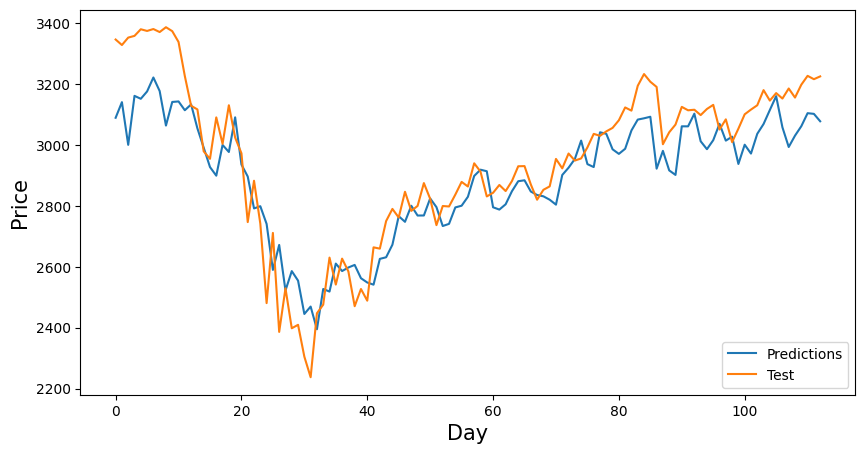

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(predictions_r, label='Predictions')
plt.plot(data_test['Price'][5:].reset_index(drop=True), label='Test')  # Reset index to match lengths
plt.legend(loc='lower right')
plt.ylabel('Price', fontsize=15)
plt.xlabel('Day', fontsize=15)
plt.show()